In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Change the directory to CodeX Training folder
%cd /content/drive/My Drive/Colab Notebooks/CodeX Training/

/content/drive/My Drive/Colab Notebooks/CodeX Training


In [ ]:
# Load the dataset
ds= pd.read_csv('./Datasets/PURCHASE.CSV')
# Delete Last Row from the Csv File
ds = ds.drop(ds.index[-1])

**Basic Information:**

Check the first few rows of the dataset to understand its structure.

Check data types, missing values, and basic statistics.

In [ ]:
#Get the columns
ds.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
ds.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category_1            float64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [ ]:
# shape of the training dataset
print('Shape of training data :',ds.shape)
# Display the first few rows
ds.head()

Shape of training data : (263014, 11)


,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
# Basic statistics
#ds.describe().T

In [ ]:
#Counting purchases of each staying years in current city
#ds['Stay_In_Current_City_Years'].value_counts()

In [ ]:
#Counting purchases of each city category
ds['City_Category'].value_counts()

B    111124
C     81100
A     70790
Name: City_Category, dtype: int64

In [ ]:
#Checking the null values
ds.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             81513
Product_Category_3            182432
Purchase                           0
dtype: int64

In [ ]:
ds['Product_Category_2'] =ds['Product_Category_2'].fillna(0).astype('int64')
ds['Product_Category_3'] =ds['Product_Category_3'].fillna(0).astype('int64')

In [ ]:
ds.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
#Calculating the dublicate entries
GetIdsUnique = len(set(ds.User_ID))
GetIdsTotal = ds.shape[0]
GetIdsDupli = GetIdsTotal - GetIdsUnique
print("Found " + str(GetIdsDupli) + " duplicate IDs for " + str(GetIdsTotal) + " total entries")

Found 257123 duplicate IDs for 263014 total entries


In [ ]:
#unique gender group
ds['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
#unique age group
ds['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
#Counting purchase of each age group
ds['Age'].value_counts()

26-35    104912
36-45     52396
18-25     48193
46-50     21619
51-55     18509
55+       10321
0-17       7064
Name: Age, dtype: int64

In [ ]:
#Encoding the categorical variables
lblEncoder = LabelEncoder()

In [ ]:
ds['Gender'] = lblEncoder.fit_transform(ds['Gender'])
ds['Age'] = lblEncoder.fit_transform(ds['Age'])
ds['City_Category'] = lblEncoder.fit_transform(ds['City_Category'])

In [ ]:
ds['Gender'].unique()

array([0, 1])

In [ ]:
#unique age group
ds['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

In [ ]:

#ds['Age']=ds['Age'].map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})
#ds.sample(10)

# 1. Perform a Detailed EDA for the Data with inferences from each of the actions.

**Data Distribution:**

Visualize the distribution of numerical columns.

Explore the distribution of categorical columns.

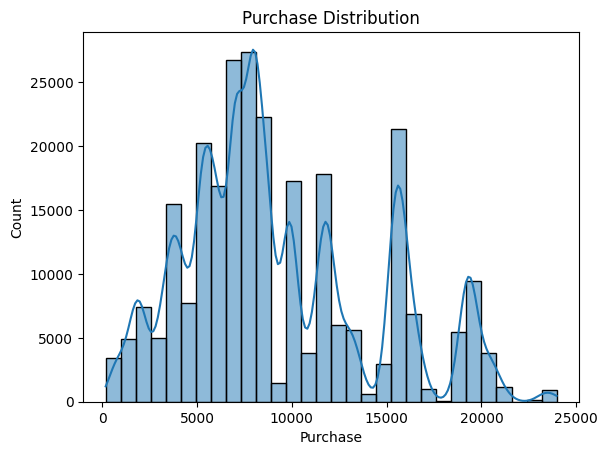

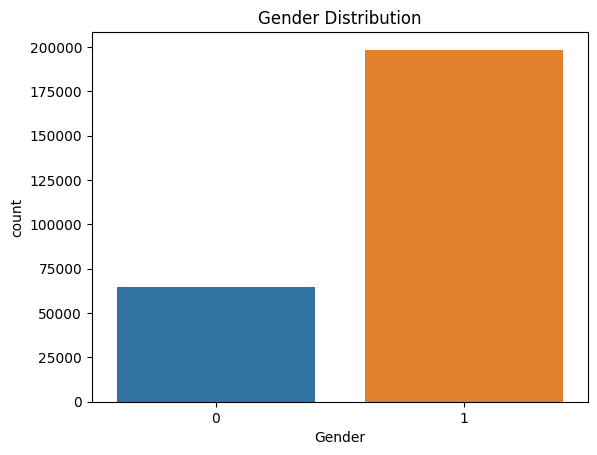

In [ ]:
# Distribution of numerical columns
sns.histplot(ds['Purchase'], bins=30, kde=True)
plt.title('Purchase Distribution')
plt.show()

# Distribution of categorical columns
sns.countplot(x='Gender', data=ds)
plt.title('Gender Distribution')
plt.show()

**Correlation Analysis:**

Explore the correlation between numerical variables.

<ipython-input-84-5c5bfb8c9406>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ds.corr()


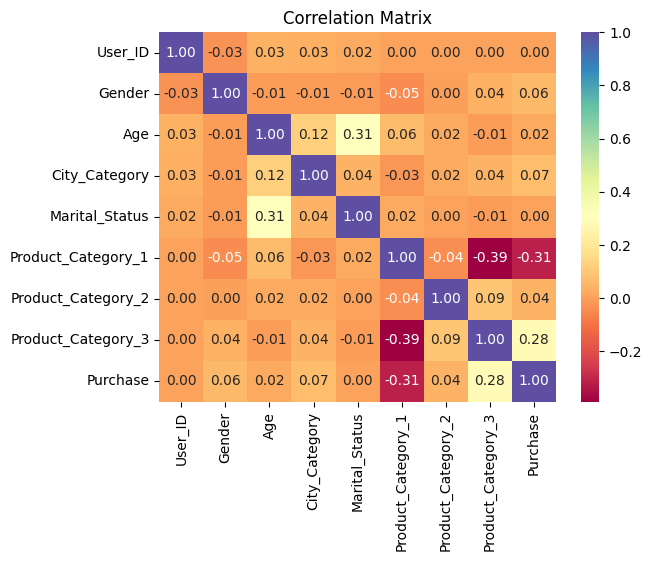

In [ ]:
# Correlation matrix
correlation_matrix = ds.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Categorical Variable Analysis:**

Explore patterns in categorical variables.

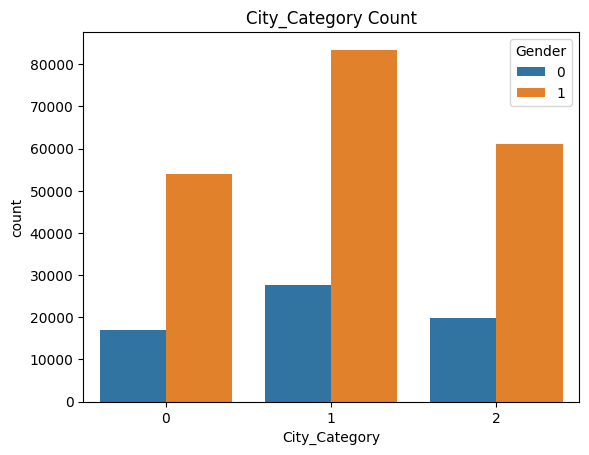

In [ ]:
# Countplot for City_Category
sns.countplot(x='City_Category', data=ds, hue='Gender')
plt.title('City_Category Count')
plt.show()

**Purchase Analysis:**

Analyze the distribution of purchase amounts and any patterns.

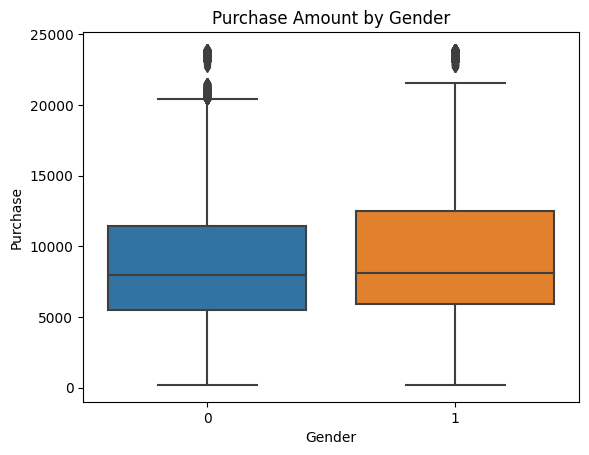

In [ ]:
# Boxplot for Purchase by Gender
sns.boxplot(x='Gender', y='Purchase', data=ds)
plt.title('Purchase Amount by Gender')
plt.show()

# 2. Using Statistical Analysis, find out statistical evidence for the following:


**a. It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?**

In [ ]:
# Filter the data for Men in the age group 18-25
men_18_25 = ds[(ds['Gender'] == 1) & (ds['Age'] == 1)]

# Calculate the average purchase amount
average_purchase_men_18_25 = men_18_25['Purchase'].mean()

print(f"The average purchase made by Men in the age group 18-25 is: {average_purchase_men_18_25:.2f}")

The average purchase made by Men in the age group 18-25 is: 9440.51


**b. It was observed that the percentage of women of the age that spend more than 10000 was 35%. Is it still the same?**

In [ ]:
# Filter the data for Women and the age group 18-25
women_data = ds[(ds['Gender'] == 0) & (ds['Age'] == 1)]

# Calculate the percentage of women spending more than 10000
percentage_women_above_10000 = (women_data[women_data['Purchase'] > 10000].shape[0] / women_data.shape[0]) * 100

print(f"The percentage of women in the specified age group spending more than 10000 is: {percentage_women_above_10000:.2f}%")

The percentage of women in the specified age group spending more than 10000 is: 27.70%


**c. Is the average purchase made by men and women of the age 18-25 same?**

In [ ]:
# Filter the data for Men and Women in the age group 18-25
men_18_25 = ds[(ds['Gender'] == 1) & (ds['Age'] == 1)]
women_18_25 = ds[(ds['Gender'] == 0) & (ds['Age'] == 1)]

# Calculate the average purchase amount for Men and Women
average_purchase_men = men_18_25['Purchase'].mean()
average_purchase_women = women_18_25['Purchase'].mean()

print(f"The average purchase made by Men in the age group 18-25 is: {average_purchase_men:.2f}")
print(f"The average purchase made by Women in the age group 18-25 is: {average_purchase_women:.2f}")

The average purchase made by Men in the age group 18-25 is: 9440.51
The average purchase made by Women in the age group 18-25 is: 8406.00


**d. Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?**

In [ ]:
# Filter the data for Men in the age group 18-25 and 26-35
men_18_25 = ds[(ds['Gender'] == 1) & (ds['Age'] == 1)]
men_26_35 = ds[(ds['Gender'] == 1) & (ds['Age'] == 2)]

# Calculate the percentage of men spending more than 10000 for each age group
percentage_men_above_10000_18_25 = (men_18_25[men_18_25['Purchase'] > 10000].shape[0] / men_18_25.shape[0]) * 100
percentage_men_above_10000_26_35 = (men_26_35[men_26_35['Purchase'] > 10000].shape[0] / men_26_35.shape[0]) * 100

print(f"The percentage of men in the age group 18-25 spending more than 10000 is: {percentage_men_above_10000_18_25:.2f}%")
print(f"The percentage of men in the age group 26-35 spending more than 10000 is: {percentage_men_above_10000_26_35:.2f}%")

The percentage of men in the age group 18-25 spending more than 10000 is: 36.68%
The percentage of men in the age group 26-35 spending more than 10000 is: 36.45%


**e. Is Purchase independent of Product_Category_1?**

To determine whether purchase is independent of Product_Category_1, we need to conduct a statistical test. A common test for independence in categorical data is the chi-square test. The null hypothesis for this test is that the two categorical variables are independent.

In this example, if the p-value is less than the chosen significance level (e.g., 0.05), we would reject the null hypothesis and conclude that there is a significant relationship between Purchase and Product_Category_1. If the p-value is greater than the significance level, you would fail to reject the null hypothesis, suggesting that purchase and Product_Category_1 are independent.

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(ds['Product_Category_1'], ds['Purchase'])
# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
# Set the significance level (e.g., 0.05)
alpha = 0.05
# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

Chi-square statistic: 2796762.6862599747
P-value: 0.0


In [ ]:
# Check if the p-value is less than the significance level
if p < alpha:
    print("Reject the null hypothesis. Purchase is dependent on Product_Category_1.")
else:
    print("Fail to reject the null hypothesis. Purchase is independent of Product_Category_1.")

Reject the null hypothesis. Purchase is dependent on Product_Category_1.
